In [349]:
# 0. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [351]:
# Part 1. Data Fetching
# 1.1 Read raw data
# Results_21Mar2022.csv is for the primary analysis in the paper
raw_data = pd.read_csv("Results_21Mar2022.csv")
raw_data

mc_run_id           grouping  mean_ghgs  mean_land  mean_watscar  \
0              1  fish_female_20-29   5.421821   8.612772   14165.86240   
1              1  fish_female_30-39   5.436673   8.680248   15222.77063   
2              1  fish_female_40-49   5.289333   8.467723   15818.80068   
3              1  fish_female_50-59   5.169020   8.219199   16962.06009   
4              1  fish_female_60-69   5.380268   8.570718   18212.66232   
...          ...                ...        ...        ...           ...   
71995       1000  veggie_male_30-39   6.615301  11.385959   13374.38105   
71996       1000  veggie_male_40-49   6.185949  10.566347   12959.68443   
71997       1000  veggie_male_50-59   5.871454   9.806539   11924.19092   
71998       1000  veggie_male_60-69   5.922496   9.873027   11310.87733   
71999       1000  veggie_male_70-79   6.339353  10.383692   11259.04221   

        mean_eut  mean_ghgs_ch4  mean_ghgs_n2o    mean_bio  mean_watuse  ...  \
0      23.945372       1.164643       0.343663  476.270413   679.923479  ...   
1      24.305262       1.154118       0.326868  467.923201   709.343785  ...   
2      24.191105       1.108404       0.310324  438.659832   707.925368  ...   
3      24.748154       1.032501       0.298130  395.787622   720.825105  ...   
4      25.559430       1.098828       0.310735  421.176867   749.392826  ...   
...          ...            ...            ...         ...          ...  ...   
71995  18.283800       1.769398       0.482313  641.918305   560.925069  ...   
71996  17.342092       1.605406       0.446074  580.913591   527.860144  ...   
71997  16.625511       1.468003       0.431966  533.784777   487.176818  ...   
71998  16.531075       1.492114       0.437879  545.453273   487.030916  ...   
71999  17.413847       1.644123       0.488487  609.164094   512.413437  ...   

         sd_eut  sd_ghgs_ch4  sd_ghgs_n2o      sd_bio   sd_watuse   sd_acid  \
0      8.167013     0.632547     0.146827  283.883428  249.472563  8.231176   
1      8.467858     0.601941     0.130298  270.247108  277.927269  7.947014   
2      8.107006     0.572941     0.119872  252.415063  275.760515  8.103589   
3      9.514028     0.509689     0.104731  209.566722  310.422445  8.712428   
4      9.258068     0.609398     0.113401  264.599257  315.922570  8.616601   
...         ...          ...          ...         ...         ...       ...   
71995  6.829520     1.524615     0.269856  610.318478  268.939576  8.510504   
71996  6.369390     1.430116     0.252651  570.034533  262.366892  7.988943   
71997  6.266982     1.381163     0.274705  559.427383  241.645519  7.780208   
71998  6.240777     1.435583     0.276000  582.000324  244.768887  7.779582   
71999  6.959953     1.426388     0.329489  576.831592  246.024277  8.942247   

       n_participants     sex  diet_group  age_group  
0                1329  female        fish      20-29  
1                2024  female        fish      30-39  
2                1689  female        fish      40-49  
3                 946  female        fish      50-59  
4                 492  female        fish      60-69  
...               ...     ...         ...        ...  
71995            1221    male      veggie      30-39  
71996             961    male      veggie      40-49  
71997             426    male      veggie      50-59  
71998             229    male      veggie      60-69  
71999             158    male      veggie      70-79  

[72000 rows x 24 columns]

In [352]:
# 1.2 Data describing
# n_participants: Participant number
# diet_group: Type of Diet
# sex: Gender
# age_group: Age Group
# mean_ghgs: Mean GHG emissions (GreenHouse Gas) measured in kg
# mean_land: Mean Agricultural Land Use in square meters
# mean_watscar: Mean Water Scarcity
# mean_eut: Mean Eutrophication
# mean_ghgs_ch4: Mean GHG from CH4 emissions (Methane) from livestock management measured in kg
# mean_ghgs_n2o: Mean GHG from N2O (Nitrous Oxide) emissions associated with fertilizer use^2
# mean_bio: Mean Biodiversity Impact–species extinction per day
# mean_watuse: Mean Agricultural Water Usage in cubic meters (1 m3 = 1,000 liters)
# mean_acid: Mean Acidification Potential
# Other columns are ignored for the rest data analysis and data visualization work
raw_data.describe()

mc_run_id     mean_ghgs     mean_land  mean_watscar      mean_eut  \
count  72000.000000  72000.000000  72000.000000  72000.000000  72000.000000   
mean     500.500000      6.173568     10.610860  18324.502556     24.619412   
std      288.676995      3.090398      8.774950   5761.426137     10.440526   
min        1.000000      1.878054      3.085156   5581.200606      7.403603   
25%      250.750000      4.272191      5.833910  14473.366153     17.490146   
50%      500.500000      5.460742      7.634004  17340.934265     22.741543   
75%      750.250000      7.498673     11.766317  20962.489797     30.143916   
max     1000.000000     20.543958     74.490099  57642.741520     85.043624   

       mean_ghgs_ch4  mean_ghgs_n2o      mean_bio   mean_watuse     mean_acid  \
count   72000.000000   72000.000000  72000.000000  72000.000000  72000.000000   
mean        1.137918       0.437283    274.693823    739.712660     27.552727   
std         0.773895       0.225046    158.917024    318.236794     11.631872   
min         0.065370       0.123047     54.748545    192.729916      7.466161   
25%         0.664186       0.279034    163.291618    541.813501     21.159961   
50%         0.978820       0.371027    232.676491    692.166596     25.561232   
75%         1.492675       0.529600    345.247131    859.515193     33.688857   
max         5.376923       1.508414   1426.913345   3333.230647     76.266195   

            sd_ghgs       sd_land    sd_watscar        sd_eut   sd_ghgs_ch4  \
count  72000.000000  72000.000000  72000.000000  72000.000000  72000.000000   
mean       2.122985      4.790976   7965.808116      7.705817      0.523346   
std        1.281355      5.685913   4738.740090      3.495072      0.356864   
min        0.510023      1.013332   1961.905132      2.032834      0.037529   
25%        1.407416      1.975443   5497.338713      5.931354      0.311368   
50%        1.748698      2.743017   6631.506037      7.003451      0.397751   
75%        2.385814      4.789304   8476.013456      8.524474      0.680099   
max       11.322617     57.001158  65377.989110     46.722319      3.197389   

        sd_ghgs_n2o        sd_bio     sd_watuse       sd_acid  n_participants  
count  72000.000000  72000.000000  72000.000000  72000.000000    72000.000000  
mean       0.161327    154.572597    330.070563      8.544557      770.888889  
std        0.086156    125.348736    243.793503      2.812237      830.476694  
min        0.038554     21.774227     62.224116      2.463158       19.000000  
25%        0.104523     72.598210    199.477119      7.414466      210.000000  
50%        0.139102    107.162915    258.216127      8.226186      440.000000  
75%        0.190786    190.312943    363.373866      9.223864      982.500000  
max        0.660292    852.387856   2897.540323     29.240519     3752.000000

In [353]:
# Part 2. Data handling
# 2.1 Data checking - null values
# Used columns
used_columns = ["grouping", "n_participants", "diet_group", "sex", "age_group",
                "mean_ghgs", "mean_land", "mean_watscar", "mean_eut",
                "mean_ghgs_ch4", "mean_ghgs_n2o", "mean_bio", "mean_watuse", "mean_acid"]

for used_column in used_columns:
    if used_column == "grouping":
        continue
    number_of_null_values = raw_data[used_column].isnull().sum()
    print("Number of null values for column " + used_column + ":", number_of_null_values)

Number of null values for column n_participants: 0
Number of null values for column diet_group: 0
Number of null values for column sex: 0
Number of null values for column age_group: 0
Number of null values for column mean_ghgs: 0
Number of null values for column mean_land: 0
Number of null values for column mean_watscar: 0
Number of null values for column mean_eut: 0
Number of null values for column mean_ghgs_ch4: 0
Number of null values for column mean_ghgs_n2o: 0
Number of null values for column mean_bio: 0
Number of null values for column mean_watuse: 0
Number of null values for column mean_acid: 0


In [354]:
# 2.2 Data checking - invalid values
# Because every row contains mean and sd(i.e. statistic data), then the values of them should be above 0
found = False
for used_column in used_columns[5:]:
    used_column_name_parts = used_column.split("_")
    used_column_sd = "sd_" + used_column_name_parts[1]
    if any(raw_data[used_column] <= 0.00) or any(raw_data[used_column_sd] <= 0.00):
        print("Invalid data at column ", used_column)
        found = True
        break
if not found:
    print("No invalid data at mean/sd columns")

No invalid data at mean/sd columns


In [355]:
# 2.3 Data columns filtering
# Delete useless columns
for column in raw_data.columns:
    if column not in used_columns:
        raw_data.drop(column, axis=1, inplace=True)
        print("Delete column:", column)

Delete column: mc_run_id
Delete column: sd_ghgs
Delete column: sd_land
Delete column: sd_watscar
Delete column: sd_eut
Delete column: sd_ghgs_ch4
Delete column: sd_ghgs_n2o
Delete column: sd_bio
Delete column: sd_watuse
Delete column: sd_acid


In [356]:
# 2.4 Data aggregating
# There are 1000 iterations of estimates of the environmental impact of
# vegans, vegetarians, fish eaters and meat eaters, aggregated at the level of age-sex-diet group.
# Then, we can aggregate by grouping_agg_data and calculate mean value.
# grouping_agg_data = raw_data.groupby("grouping").agg("mean")
# grouping_agg_data

# 2.4.1 Different diet type
diet_type_agg_data = raw_data.drop("n_participants", axis=1).groupby("diet_group").agg("mean")
diet_type_agg_data

/var/folders/8z/c4sjd7050p1g8dq3snxc484m0000gn/T/ipykernel_91936/1423629373.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diet_type_agg_data = raw_data.drop("n_participants", axis=1).groupby("diet_group").agg("mean")


mean_ghgs  mean_land  mean_watscar   mean_eut  mean_ghgs_ch4  \
diet_group                                                                 
fish         5.133366   6.853120  18565.613639  21.730615       0.859837   
meat         7.553983  13.086665  19284.331898  30.317774       1.506246   
meat100     11.425865  24.010061  22497.223846  42.258796       2.439530   
meat50       5.797222   8.662609  17817.131705  24.081761       1.091782   
vegan        2.612561   4.510695  15312.488198  11.461199       0.151321   
veggie       4.518411   6.542007  16470.226046  17.866328       0.778792   

            mean_ghgs_n2o    mean_bio  mean_watuse  mean_acid  
diet_group                                                     
fish             0.336662  257.354033   798.555192  24.101781  
meat             0.535134  318.944165   863.870920  33.999236  
meat100          0.834428  422.000804   974.222937  46.779738  
meat50           0.395534  272.634156   782.299134  27.172879  
vegan            0.218324  124.367816   450.019441  11.598582  
veggie           0.303612  252.861965   569.308337  21.664146

In [357]:
# 2.4.2 Different age group
age_agg_data = raw_data.drop("n_participants", axis=1).groupby("age_group").agg("mean")
age_agg_data

/var/folders/8z/c4sjd7050p1g8dq3snxc484m0000gn/T/ipykernel_91936/1101864167.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_agg_data = raw_data.drop("n_participants", axis=1).groupby("age_group").agg("mean")


mean_ghgs  mean_land  mean_watscar   mean_eut  mean_ghgs_ch4  \
age_group                                                                 
20-29       6.069516  10.060604  18157.112625  25.366128       1.102353   
30-39       6.035579  10.010351  18214.004364  24.621970       1.086224   
40-49       6.165242  10.622989  17924.219564  24.464953       1.128485   
50-59       6.185462  10.768530  18057.825445  24.237947       1.142144   
60-69       6.197227  10.849969  18589.801400  24.250111       1.155708   
70-79       6.388383  11.352714  19004.051933  24.775365       1.212594   

           mean_ghgs_n2o    mean_bio  mean_watuse  mean_acid  
age_group                                                     
20-29           0.434350  271.138896   746.678764  27.441145  
30-39           0.427850  271.463233   742.062907  27.145761  
40-49           0.434245  275.282311   717.841980  27.348965  
50-59           0.435094  272.714974   725.834833  27.505688  
60-69           0.438855  274.896436   744.942164  27.725065  
70-79           0.453301  282.667088   760.915313  28.149738

In [358]:
# 2.4.3 Different gender
gender_agg_data = raw_data.drop("n_participants", axis=1).groupby("sex").agg("mean")
gender_agg_data

/var/folders/8z/c4sjd7050p1g8dq3snxc484m0000gn/T/ipykernel_91936/38846655.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_agg_data = raw_data.drop("n_participants", axis=1).groupby("sex").agg("mean")


mean_ghgs  mean_land  mean_watscar   mean_eut  mean_ghgs_ch4  \
sex                                                                    
female   6.025316  10.366234  18030.744069  23.880025       1.117766   
male     6.321821  10.855485  18618.261042  25.358800       1.158070   

        mean_ghgs_n2o    mean_bio  mean_watuse  mean_acid  
sex                                                        
female       0.426216  269.788403   729.622604  26.985084  
male         0.448349  279.599243   749.802716  28.120370

In [359]:
# 2.4.4 Different gender and age
gender_age_agg_data = raw_data.drop("n_participants", axis=1).groupby(["sex", "age_group"]).agg("mean")
gender_age_agg_data

/var/folders/8z/c4sjd7050p1g8dq3snxc484m0000gn/T/ipykernel_91936/782553739.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_age_agg_data = raw_data.drop("n_participants", axis=1).groupby(["sex", "age_group"]).agg("mean")


mean_ghgs  mean_land  mean_watscar   mean_eut  \
sex    age_group                                                  
female 20-29       5.682815   9.443745  17285.517029  23.602112   
       30-39       5.816152   9.696642  17591.254667  23.579256   
       40-49       6.050409  10.479518  17773.921398  23.888441   
       50-59       6.123269  10.700626  18105.831746  23.808986   
       60-69       6.188886  10.778262  18534.413074  24.078302   
       70-79       6.290362  11.098612  18893.526502  24.323051   
male   20-29       6.456217  10.677462  19028.708222  27.130144   
       30-39       6.255005  10.324059  18836.754062  25.664683   
       40-49       6.280075  10.766461  18074.517730  25.041465   
       50-59       6.247655  10.836435  18009.819145  24.666907   
       60-69       6.205568  10.921677  18645.189726  24.421920   
       70-79       6.486403  11.606815  19114.577364  25.227679   

                  mean_ghgs_ch4  mean_ghgs_n2o    mean_bio  mean_watuse  \
sex    age_group                                                          
female 20-29           1.033330       0.406881  256.998713   713.959711   
       30-39           1.055499       0.412448  263.559735   717.492912   
       40-49           1.120259       0.426531  271.738907   713.802843   
       50-59           1.139959       0.430774  271.117973   728.349280   
       60-69           1.161093       0.435138  275.235108   746.744216   
       70-79           1.196454       0.445523  280.079982   757.386662   
male   20-29           1.171376       0.461820  285.279079   779.397816   
       30-39           1.116948       0.443253  279.366731   766.632903   
       40-49           1.136710       0.441959  278.825715   721.881116   
       50-59           1.144329       0.439414  274.311975   723.320386   
       60-69           1.150323       0.442572  274.557765   743.140113   
       70-79           1.228734       0.461078  285.254193   764.443964   

                  mean_acid  
sex    age_group             
female 20-29      25.724576  
       30-39      26.223330  
       40-49      26.943444  
       50-59      27.316305  
       60-69      27.773743  
       70-79      27.929105  
male   20-29      29.157714  
       30-39      28.068192  
       40-49      27.754485  
       50-59      27.695072  
       60-69      27.676387  
       70-79      28.370371

In [360]:
# 2.4.5 Transpose diet_type_agg_data
diet_type_agg_transpose_data = diet_type_agg_data.T
diet_type_agg_transpose_data

diet_group             fish          meat       meat100        meat50  \
mean_ghgs          5.133366      7.553983     11.425865      5.797222   
mean_land          6.853120     13.086665     24.010061      8.662609   
mean_watscar   18565.613639  19284.331898  22497.223846  17817.131705   
mean_eut          21.730615     30.317774     42.258796     24.081761   
mean_ghgs_ch4      0.859837      1.506246      2.439530      1.091782   
mean_ghgs_n2o      0.336662      0.535134      0.834428      0.395534   
mean_bio         257.354033    318.944165    422.000804    272.634156   
mean_watuse      798.555192    863.870920    974.222937    782.299134   
mean_acid         24.101781     33.999236     46.779738     27.172879   

diet_group            vegan        veggie  
mean_ghgs          2.612561      4.518411  
mean_land          4.510695      6.542007  
mean_watscar   15312.488198  16470.226046  
mean_eut          11.461199     17.866328  
mean_ghgs_ch4      0.151321      0.778792  
mean_ghgs_n2o      0.218324      0.303612  
mean_bio         124.367816    252.861965  
mean_watuse      450.019441    569.308337  
mean_acid         11.598582     21.664146

In [361]:
# 2.4.6 Transpose age_agg_data
age_agg_transpose_data = age_agg_data.T
age_agg_transpose_data

age_group             20-29         30-39         40-49         50-59  \
mean_ghgs          6.069516      6.035579      6.165242      6.185462   
mean_land         10.060604     10.010351     10.622989     10.768530   
mean_watscar   18157.112625  18214.004364  17924.219564  18057.825445   
mean_eut          25.366128     24.621970     24.464953     24.237947   
mean_ghgs_ch4      1.102353      1.086224      1.128485      1.142144   
mean_ghgs_n2o      0.434350      0.427850      0.434245      0.435094   
mean_bio         271.138896    271.463233    275.282311    272.714974   
mean_watuse      746.678764    742.062907    717.841980    725.834833   
mean_acid         27.441145     27.145761     27.348965     27.505688   

age_group             60-69         70-79  
mean_ghgs          6.197227      6.388383  
mean_land         10.849969     11.352714  
mean_watscar   18589.801400  19004.051933  
mean_eut          24.250111     24.775365  
mean_ghgs_ch4      1.155708      1.212594  
mean_ghgs_n2o      0.438855      0.453301  
mean_bio         274.896436    282.667088  
mean_watuse      744.942164    760.915313  
mean_acid         27.725065     28.149738

In [362]:
# 2.4.7 Transpose gender_agg_data
gender_agg_transpose_data = gender_agg_data.T
gender_agg_transpose_data

sex                  female          male
mean_ghgs          6.025316      6.321821
mean_land         10.366234     10.855485
mean_watscar   18030.744069  18618.261042
mean_eut          23.880025     25.358800
mean_ghgs_ch4      1.117766      1.158070
mean_ghgs_n2o      0.426216      0.448349
mean_bio         269.788403    279.599243
mean_watuse      729.622604    749.802716
mean_acid         26.985084     28.120370

In [363]:
# 2.4.8 Transpose gender_age_agg_data
gender_age_agg_transpose_data = gender_age_agg_data.T
gender_age_agg_transpose_data

sex                  female                                            \
age_group             20-29         30-39         40-49         50-59   
mean_ghgs          5.682815      5.816152      6.050409      6.123269   
mean_land          9.443745      9.696642     10.479518     10.700626   
mean_watscar   17285.517029  17591.254667  17773.921398  18105.831746   
mean_eut          23.602112     23.579256     23.888441     23.808986   
mean_ghgs_ch4      1.033330      1.055499      1.120259      1.139959   
mean_ghgs_n2o      0.406881      0.412448      0.426531      0.430774   
mean_bio         256.998713    263.559735    271.738907    271.117973   
mean_watuse      713.959711    717.492912    713.802843    728.349280   
mean_acid         25.724576     26.223330     26.943444     27.316305   

sex                                                male                \
age_group             60-69         70-79         20-29         30-39   
mean_ghgs          6.188886      6.290362      6.456217      6.255005   
mean_land         10.778262     11.098612     10.677462     10.324059   
mean_watscar   18534.413074  18893.526502  19028.708222  18836.754062   
mean_eut          24.078302     24.323051     27.130144     25.664683   
mean_ghgs_ch4      1.161093      1.196454      1.171376      1.116948   
mean_ghgs_n2o      0.435138      0.445523      0.461820      0.443253   
mean_bio         275.235108    280.079982    285.279079    279.366731   
mean_watuse      746.744216    757.386662    779.397816    766.632903   
mean_acid         27.773743     27.929105     29.157714     28.068192   

sex                                                                    
age_group             40-49         50-59         60-69         70-79  
mean_ghgs          6.280075      6.247655      6.205568      6.486403  
mean_land         10.766461     10.836435     10.921677     11.606815  
mean_watscar   18074.517730  18009.819145  18645.189726  19114.577364  
mean_eut          25.041465     24.666907     24.421920     25.227679  
mean_ghgs_ch4      1.136710      1.144329      1.150323      1.228734  
mean_ghgs_n2o      0.441959      0.439414      0.442572      0.461078  
mean_bio         278.825715    274.311975    274.557765    285.254193  
mean_watuse      721.881116    723.320386    743.140113    764.443964  
mean_acid         27.754485     27.695072     27.676387     28.370371

In [364]:
# 2.4.9 Normalize data
def get_normalized_data(dataset):
    normalized_data = dataset.copy()
    normalized_columns = normalized_data.columns
    base_column = normalized_columns[0]
    for i in range(1, len(normalized_columns)):
        current_column = normalized_columns[i]
        normalized_data[current_column] = (normalized_data[current_column] - normalized_data[base_column]) * 100.0 / normalized_data[base_column]
    normalized_data[base_column] = 0.00
    return normalized_data


diet_type_agg_normalized_data = get_normalized_data(diet_type_agg_transpose_data)
gender_agg_normalized_data = get_normalized_data(gender_agg_transpose_data)
age_agg_normalized_data = get_normalized_data(age_agg_transpose_data)
gender_age_agg_normalized_data = get_normalized_data(gender_age_agg_transpose_data)
print(diet_type_agg_normalized_data)
print(gender_agg_normalized_data)
print(age_agg_normalized_data)
print(gender_age_agg_normalized_data)

diet_group     fish       meat     meat100     meat50      vegan     veggie
mean_ghgs       0.0  47.154587  122.580375  12.932185 -49.106280 -11.979560
mean_land       0.0  90.959231  250.352267  26.403869 -34.180416  -4.539732
mean_watscar    0.0   3.871234   21.176840  -4.031550 -17.522316 -11.286390
mean_eut        0.0  39.516407   94.466633  10.819508 -47.257828 -17.782686
mean_ghgs_ch4   0.0  75.178200  183.720210  26.975485 -82.401244  -9.425528
mean_ghgs_n2o   0.0  58.953009  147.853322  17.487035 -35.150313  -9.816896
mean_bio        0.0  23.932064   63.976760   5.937394 -51.674425  -1.745482
mean_watuse     0.0   8.179238   21.998197  -2.035684 -43.645794 -28.707703
mean_acid       0.0  41.065244   94.092457  12.742206 -51.876658 -10.113920
sex            female      male
mean_ghgs         0.0  4.920985
mean_land         0.0  4.719654
mean_watscar      0.0  3.258418
mean_eut          0.0  6.192517
mean_ghgs_ch4     0.0  3.605772
mean_ghgs_n2o     0.0  5.193049
mean_bio        

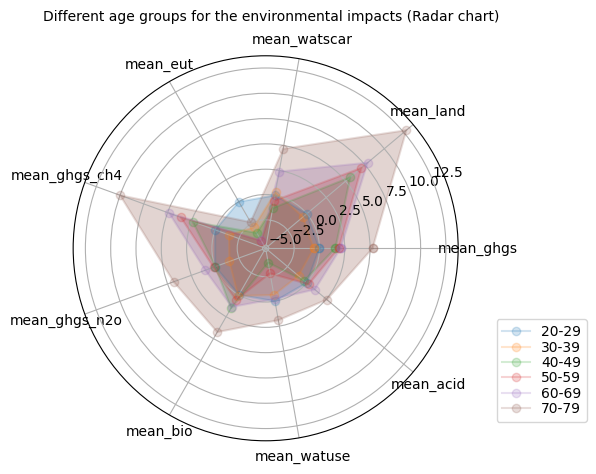

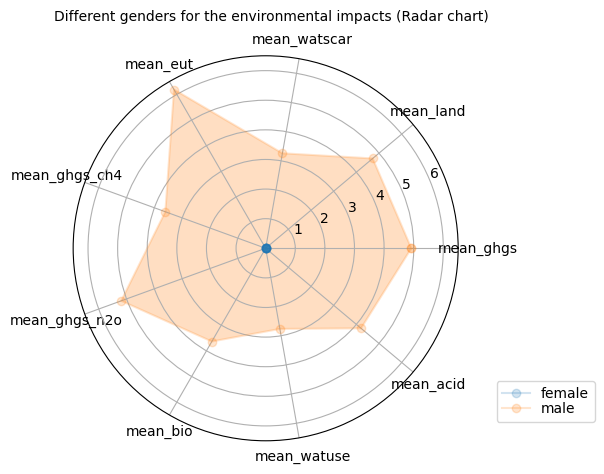

In [365]:
# Part 3. Data Analysis and Visualization
# Next, we use grouping_agg_data,
# to make researches of the impact of diet on environment from different dimensions
# One-variable
def plot_and_save_radar_chart(dataset, chart_title, chart_name):
    index = dataset.index
    columns = dataset.columns

    radar_labels = dataset.index
    number_of_attributes = len(index)
    data = dataset.values
    data_labels = columns

    angles = np.linspace(0, 2 * np.pi, number_of_attributes, endpoint= False)
    data = np.concatenate((data, [data[0]]))
    angles = np.concatenate((angles, [angles[0]]))

    fig = plt.figure(facecolor="white", figsize=(8, 5))
    plt.subplot(111, polar=True)

    plt.plot(angles, data, 'o-', linewidth=1.5, alpha=0.2)

    plt.fill(angles, data, alpha=0.25)
    plt.thetagrids(angles[:-1] * 180 / np.pi, radar_labels, 1.2)
    plt.figtext(0.52, 0.95, chart_title, ha='center', size=10)

    legend = plt.legend(data_labels, loc=(1.1, 0.05), labelspacing=0.1)
    plt.setp(legend.get_texts(), fontsize='medium')
    plt.grid(True)
    plt.savefig(chart_name)
    plt.show()


plot_and_save_radar_chart(diet_type_agg_normalized_data,
                          "Different diet types for the environmental impacts (Radar chart)",
                          "diet_type_radar.png")
plot_and_save_radar_chart(age_agg_normalized_data,
                          "Different age groups for the environmental impacts (Radar chart)",
                          "age_radar.png")
plot_and_save_radar_chart(gender_agg_normalized_data,
                          "Different genders for the environmental impacts (Radar chart)",
                          "gender_radar.png")
plot_and_save_radar_chart(gender_age_agg_normalized_data,
                          "Different (gender, age group)s for the environmental impacts (Radar chart)",
                          "gender_age_radar.png")

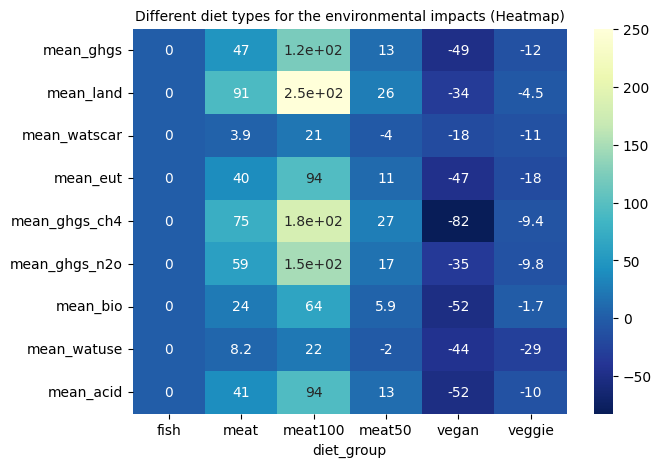

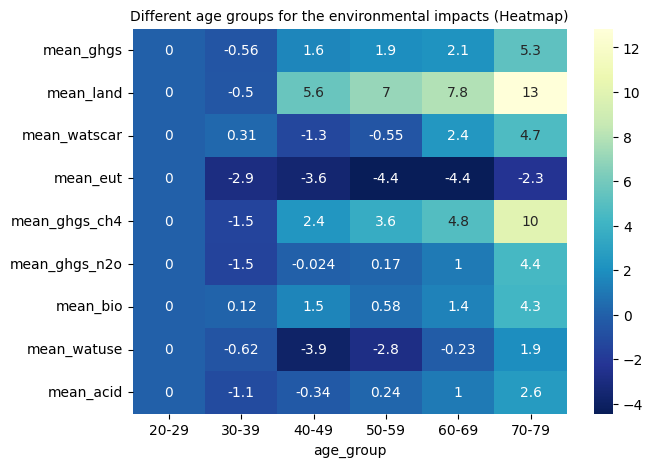

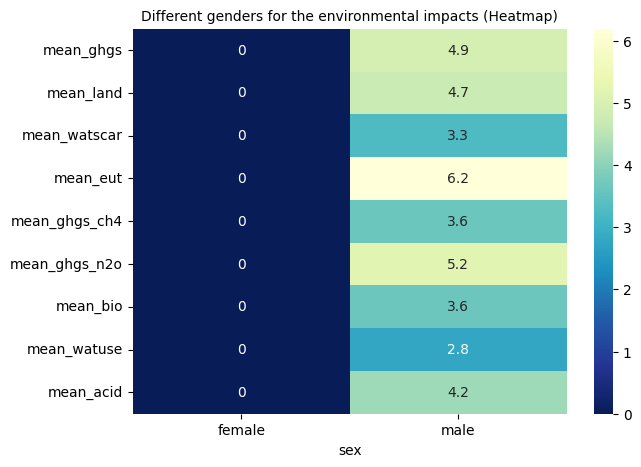

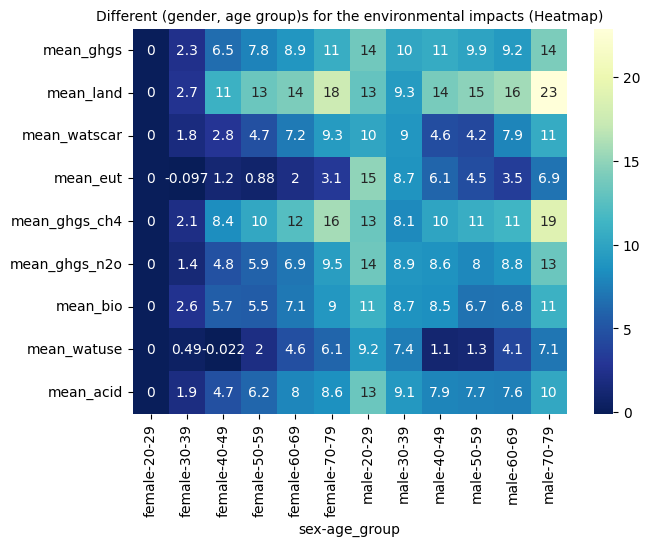

In [366]:
def plot_and_save_heatmap(dataset, chart_title, chart_name):
    fig = plt.figure(figsize=(7, 5))
    plt.title(chart_title, size=10)
    heat_map = sns.heatmap(dataset, cmap="YlGnBu_r", annot=True)
    saved_heat_map = heat_map.get_figure()
    saved_heat_map.savefig(chart_name, dpi=300, bbox_inches='tight')


plot_and_save_heatmap(diet_type_agg_normalized_data,
                      "Different diet types for the environmental impacts (Heatmap)",
                      "diet_type_heatmap.png")
plot_and_save_heatmap(age_agg_normalized_data,
                      "Different age groups for the environmental impacts (Heatmap)",
                      "age_heatmap.png")
plot_and_save_heatmap(gender_agg_normalized_data,
                      "Different genders for the environmental impacts (Heatmap)",
                      "gender_heatmap.png")
plot_and_save_heatmap(gender_age_agg_normalized_data,
                      "Different (gender, age group)s for the environmental impacts (Heatmap)",
                      "gender_age_heatmap.png")